# Application to another dataset

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dimension of X: (500, 2)
dimension of y: (500, 1)


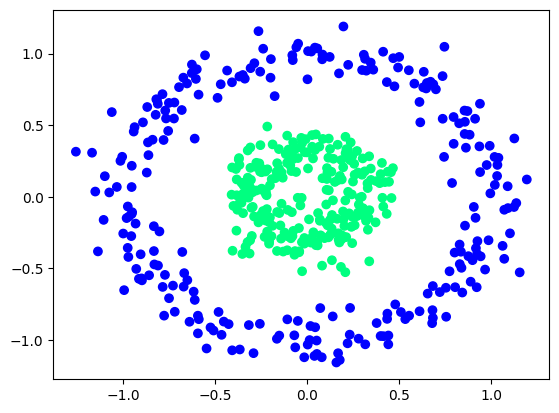

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=0)
y = y.reshape((y.shape[0],1))

print('dimension of X:', X.shape)
print('dimension of y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.show()

In [3]:
#Initialization of W and b
def initialisation(X):
    W = np.random.randn(X.shape[1], 1) #X1, x2 ==> W1, W2
    b = np.random.randn(1) # b is real number
    return (W, b)

In [4]:
# Linear Model
def model(X, W, b):
    Z = X.dot(W) + b   #Z=X.W+b 
    A = 1 / (1 + np.exp(-Z)) #Activation sigmoid (A.shape ==> (300,1)) ==> 300 outcomes, one per sample
    return A

In [5]:
# Gradients dL/dW and dL/db
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
# Update Gradient descent 
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [7]:
# Cost function  (VOIR LOSS QUADRATIQUE)
def logloss_basic(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
 
#log_loss(A,y) ==> real number

In [8]:
# Function to predict
def predict(X, W, b):
    A = model(X, W, b)
    #print(A) #to see the probabilities
    return A >= 0.5
# if A>0.5 ==> True

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
# Aggregation of the function to construct the artificial neuron
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 200):
    
    # Train the model
    W, b = initialisation(X)
    Loss_basic = []
    for i in range(n_iter):
        A = model(X, W, b)  #A : result of the model
        Loss_basic.append(logloss_basic(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Predictions y_pred for the 300 samples
    y_pred = predict(X, W, b)
    print('Accuracy =', round(accuracy_score(y, y_pred)*100,3),'%')
    
    # Show the loss function (errors) at each iteration
    plt.plot(Loss_basic)
    plt.show()
    
    # Return the parameters of the model to use them after to predict with the same model without retrain
    return (W, b)

Accuracy = 51.0 %


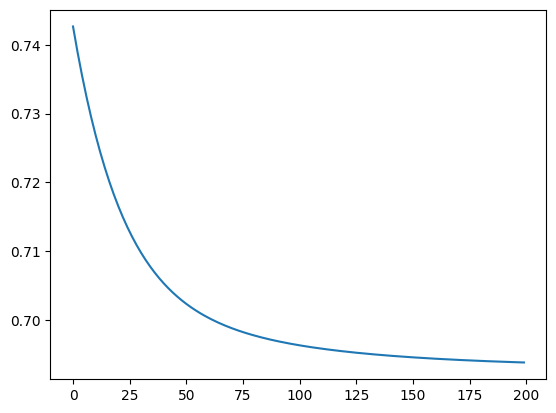

In [11]:
W, b = artificial_neuron(X, y)

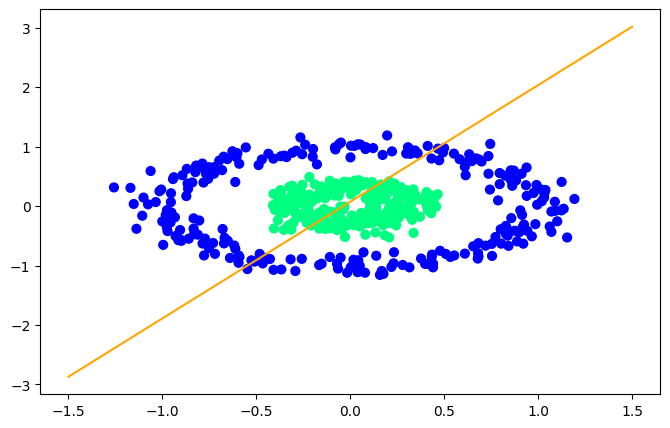

In [12]:
#Compare the errors to the Accuracy value

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter',s=40)
x1 = np.linspace(-1.5, 1.5)
x2 = ( - W[0] * x1 - b) / W[1] 

ax.plot(x1, x2, c='orange')


(-1.2563895315645788, 1.288790300356348)

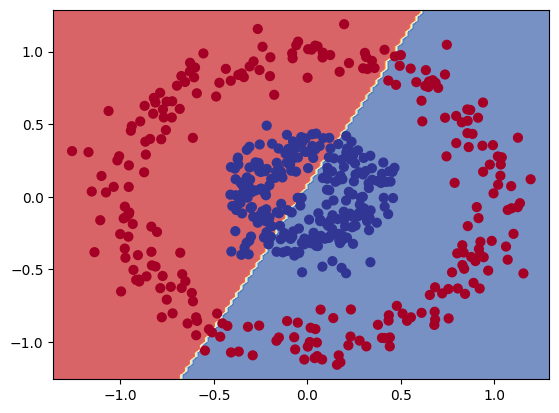

In [13]:
# For the visualisation of the decision boundaries 

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict(x_in, W, b)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())